##### Link to kaggle problem : https://www.kaggle.com/c/competitive-data-science-predict-future-sales/notebooks?sortBy=voteCount&group=everyone&pageSize=20&competitionId=8587

### Steps involved

1. Understand the problem. We'll look at each variable and do a philosophical analysis about their meaning and importance for this problem.

2. Univariable study. We'll just focus on the dependent variable ('SalePrice') and try to know a little bit more about it.

3. Multivariate study. We'll try to understand how the dependent variable and independent variables relate.
    Basic cleaning. We'll clean the dataset and handle the missing data, outliers and categorical variables.
    Test assumptions. We'll check if our data meets the assumptions required by most multivariate techniques.


In [648]:
#import some necessary librairies

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import matplotlib.pyplot as plt  # Matlab-style plotting
%matplotlib inline

import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')


from scipy import stats
from scipy.stats import norm, skew #for some statistics


pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points


In [649]:
#Now let's import and put the train and test datasets in  pandas dataframe

train = pd.read_csv('/Users/menukajaiswal/Downloads/house_price/train.csv')
test = pd.read_csv('/Users/menukajaiswal/Downloads/house_price/test.csv')


In [650]:
##display the first five rows of the train dataset.
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [651]:
#check the numbers of samples and features
print("The train data size  is : {} ".format(train.shape))
print("The test data size is : {} ".format(test.shape))

The train data size  is : (1460, 81) 
The test data size is : (1459, 80) 


In [652]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [653]:
#Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

# Analysis of target variable

------ is the variable we need to predict. So let's do some analysis on this variable first.


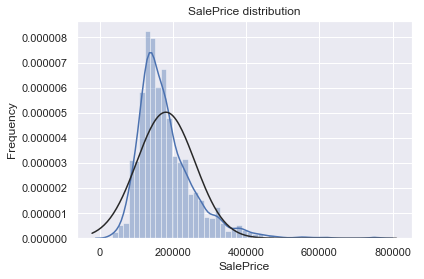

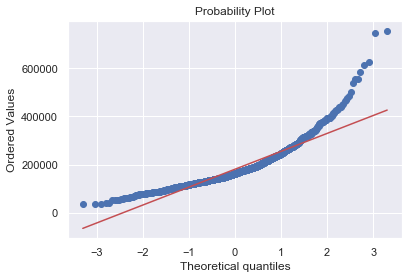

In [654]:


#Now plot the distribution
sns.distplot(train['SalePrice'] , fit=norm);
plt.ylabel('Frequency')
plt.title('SalePrice distribution');

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

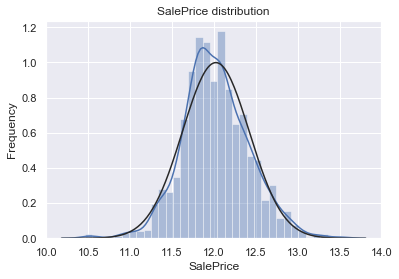

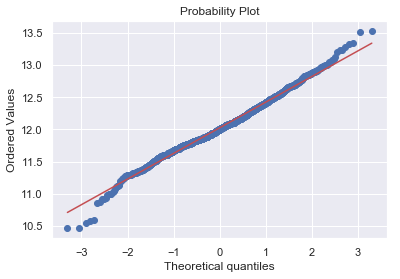

In [348]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"])

#Check the new distribution 
sns.distplot(train['SalePrice'] , fit=norm);
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)


#The skew seems now corrected and the data appears more normally distributed. 

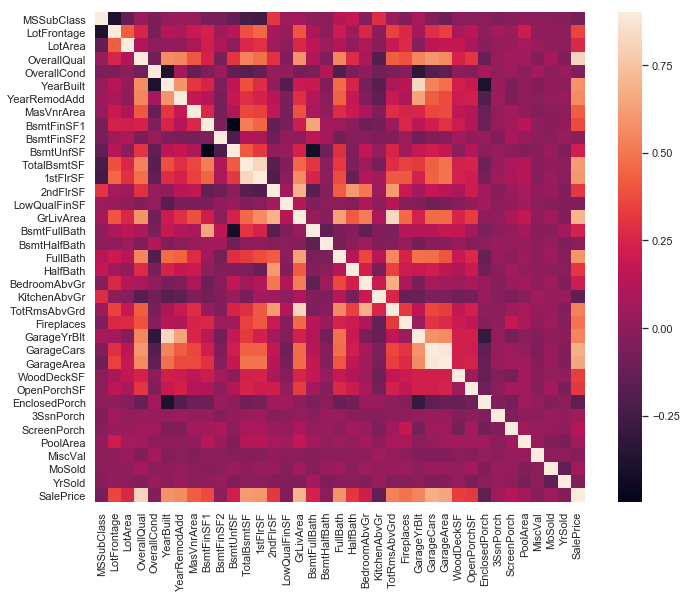

In [349]:
#Correlation map to see how features are correlated with SalePrice
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True);

In [350]:
#missing data
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995
MiscFeature,1406,0.963
Alley,1369,0.938
Fence,1179,0.808
FireplaceQu,690,0.473
LotFrontage,259,0.177
GarageType,81,0.055
GarageCond,81,0.055
GarageFinish,81,0.055
GarageQual,81,0.055


## Check distributions of continuos data to decide to replace with mean, median , mode etc

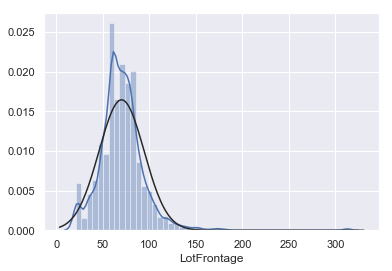

In [351]:
sns.distplot(train['LotFrontage'].dropna() , fit=norm);

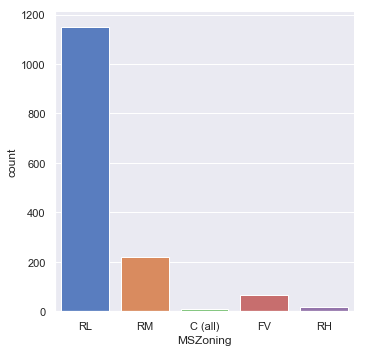

In [352]:
train['MSZoning'].value_counts(normalize=True)
sns.catplot(x="MSZoning", kind="count", palette = "muted", data=train);

In [353]:
train["PoolQC"] = train["PoolQC"].fillna("None")

#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
train["LotFrontage"] = train.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    train[col] = train[col].fillna(0)
    
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    train[col] = train[col].fillna('None')
    
train['MSZoning'] = train['MSZoning'].fillna(train['MSZoning'].mode()[0])

train = train.drop(['Utilities'], axis=1)

train["Functional"] = train["Functional"].fillna("Typ")

In [354]:
#Check remaining missing values if any 
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
MiscFeature,1406,0.963
Alley,1369,0.938
Fence,1179,0.808
FireplaceQu,690,0.473
GarageType,81,0.055
GarageFinish,81,0.055
GarageQual,81,0.055
GarageCond,81,0.055
MasVnrType,8,0.005
MasVnrArea,8,0.005


In [355]:
len(train.columns)

79

In [356]:
train=train.drop(['MiscFeature','Alley','Fence','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','MasVnrType','MasVnrArea','Electrical'],
          axis=1
          )

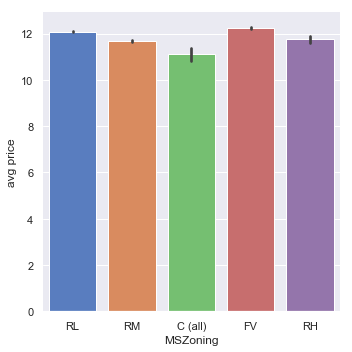

In [357]:
g = sns.catplot(x="MSZoning",y="SalePrice" , data=train, kind="bar", size = 5 , palette = "muted")
g.despine(left=True)
g = g.set_ylabels("avg price")



# Check Outliers 

In [358]:
numeric_feats = train.dtypes[train.dtypes != "object"].index
len(numeric_feats)


36

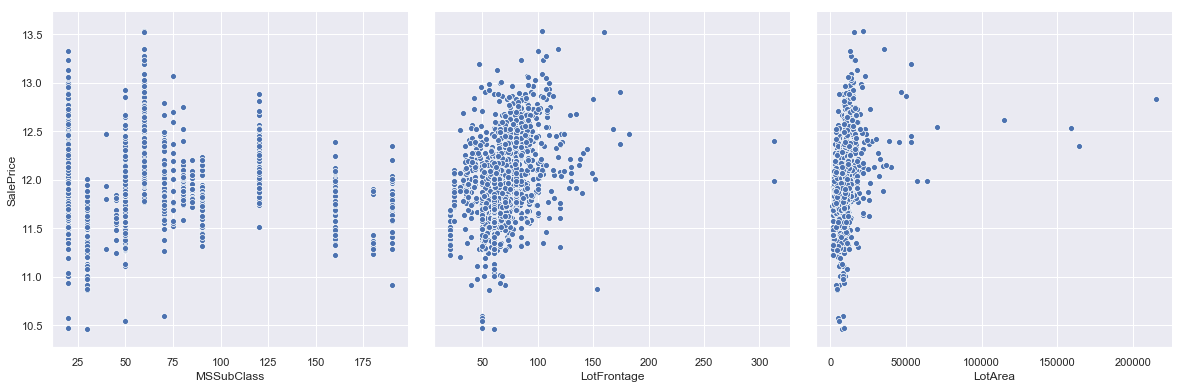

In [359]:
g = sns.pairplot(train,x_vars=numeric_feats[:3], y_vars=["SalePrice"], size=5.5)

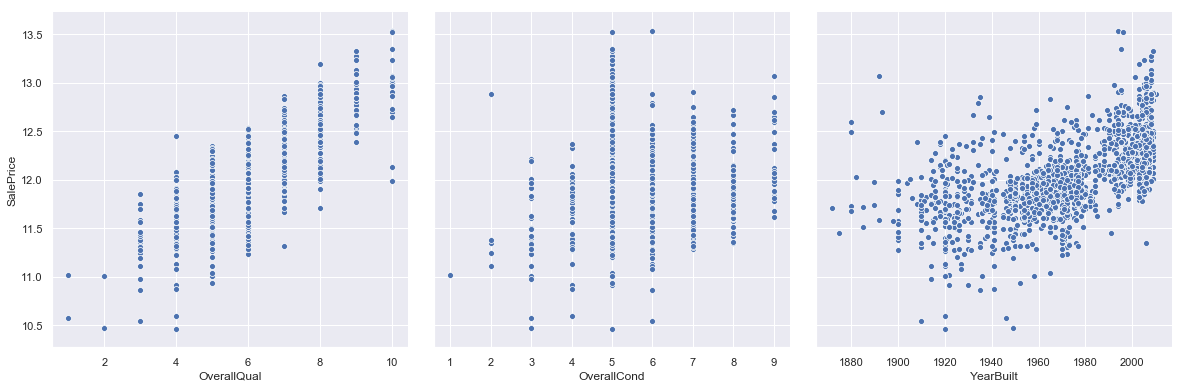

In [360]:
g = sns.pairplot(train,x_vars=numeric_feats[3:6], y_vars=["SalePrice"], size=5.5)

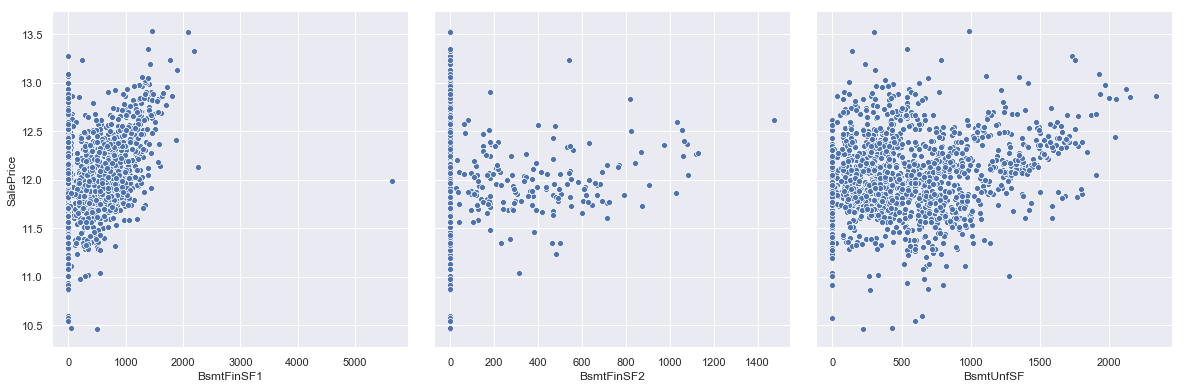

In [361]:
g = sns.pairplot(train,x_vars=numeric_feats[7:10], y_vars=["SalePrice"], size=5.5)

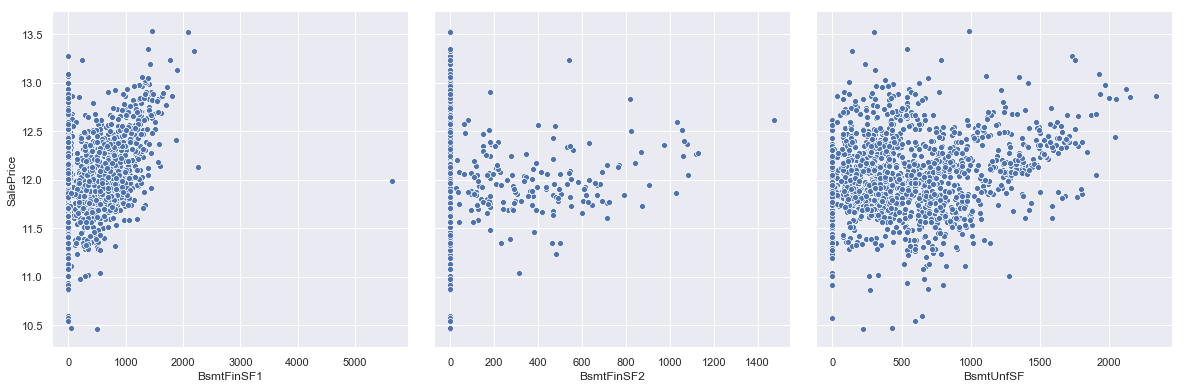

In [362]:
g = sns.pairplot(train,x_vars=numeric_feats[7:10], y_vars=["SalePrice"], size=5.5)

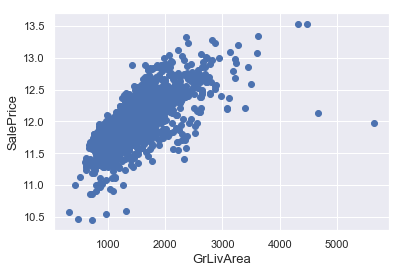

In [363]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

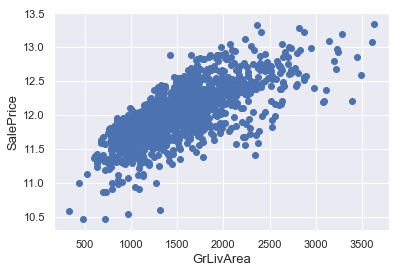

In [364]:
#Deleting outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

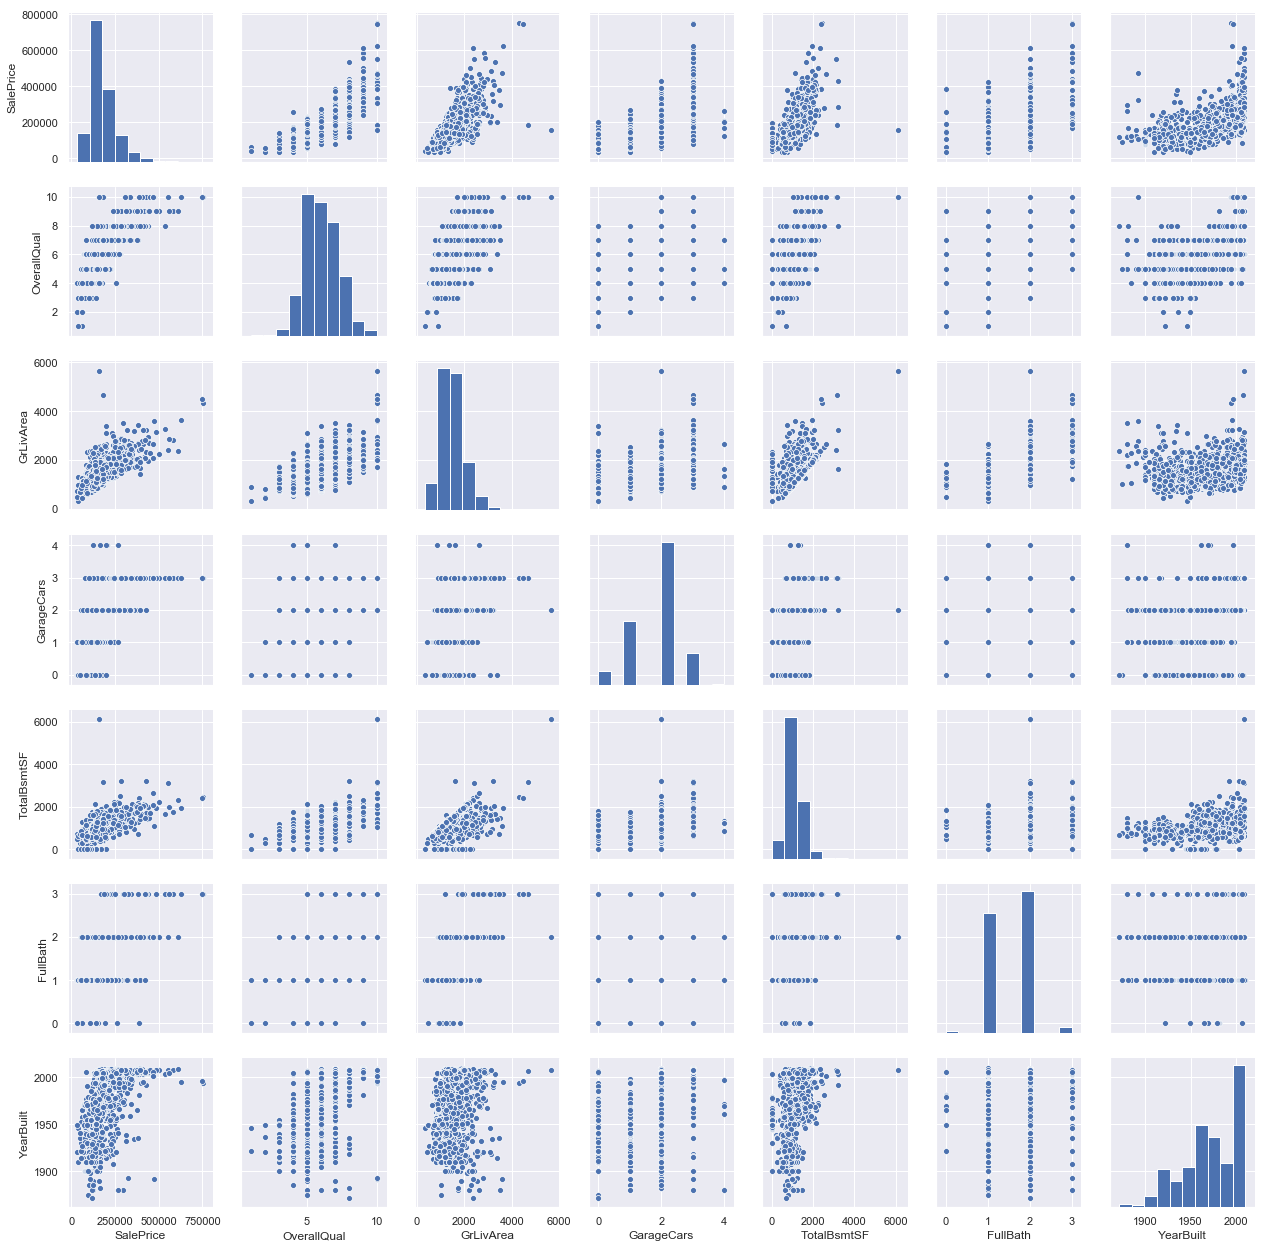

In [365]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

## Transforming some numerical variables that are really categorical

In [366]:
#MSSubClass=The building class
train['MSSubClass'] = train['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
train['OverallCond'] = train['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
train['YrSold'] = train['YrSold'].astype(str)
train['MoSold'] = train['MoSold'].astype(str)

### Label Encoding some categorical variables that may contain information in their ordering set

In [367]:


from sklearn.preprocessing import LabelEncoder
cols = ( 'BsmtQual', 'BsmtCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'BsmtExposure',  'LandSlope',
        'LotShape', 'PavedDrive', 'Street',  'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features

for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(train[c].values)) 
    train[c] = lbl.transform(list(train[c].values))

# shape        
print('Shape all_data: {}'.format(train.shape))



Shape all_data: (1456, 68)


### Adding one more important feature

In [368]:
# Adding total sqfootage feature 
train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']

In [378]:
# Skewed features

numeric_feats = train.dtypes[train.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(20)



Skew in numerical features: 



,Skew
MiscVal,24.418
PoolArea,17.505
LotArea,12.575
3SsnPorch,10.279
LowQualFinSF,8.989
LandSlope,4.801
KitchenAbvGr,4.477
BsmtFinSF2,4.244
BsmtHalfBath,4.125
ScreenPorch,4.111


Box Cox Transformation of (highly) skewed features

We use the scipy function boxcox1p which computes the Box-Cox transformation of 1+𝑥.

Note that setting 𝜆=0

is equivalent to log1p used above for the target variable.

See [this page][1] for more details on Box Cox Transformation as well as [the scipy function's page][2] [1]: http://onlinestatbook.com/2/transformations/box-cox.html [2]: https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.special.boxcox1p.html

In [383]:
skew = abs(skewness) > 0.75
skewness = skewness[skew.Skew]

print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    train[feat] = boxcox1p(train[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])

There are 30 skewed numerical features to Box Cox transform


## Getting dummy categorical features


In [384]:
train = pd.get_dummies(train)
print(train.shape)


(1456, 193)


In [385]:
train.head()

,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,9,5.831,19.212,0.730,3,0.000,7,4,2003,2003,...,0,0,0,1,0,0,0,0,1,0
1,4,6.221,19.712,0.730,3,0.000,6,7,1976,1976,...,0,0,0,1,0,0,0,0,1,0
2,9,5.915,20.347,0.730,0,0.000,7,4,2001,2002,...,0,0,0,1,0,0,0,0,1,0
3,10,5.685,19.692,0.730,0,0.000,7,4,1915,1970,...,0,0,0,1,1,0,0,0,0,0
4,9,6.315,21.325,0.730,0,0.000,8,4,2000,2000,...,0,0,0,1,0,0,0,0,1,0


In [386]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values

In [394]:
train = train.drop('SalePrice', axis=1)

# Modelling

In [426]:
from sklearn.linear_model import ElasticNet, Lasso,ElasticNetCV,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [540]:
#Validation function
#Note how the optimal value of alpha varies for each fold. This illustrates why nested-cross validation is necessary when trying to evaluate the performance of a method for which a parameter is chosen by cross-validation: this choice of parameter may not be optimal for unseen data.

n_folds = 15
def rmse_cv(model, X, y):
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
    rmse= np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [541]:
from sklearn import preprocessing
scaler = preprocessing.RobustScaler().fit(train.values)
X_train_transformed = scaler.transform(train.values)

In [544]:
#First try giving default alphas for cv and then look at the range of alphas tried and then give a list of alphas

enetcv = ElasticNetCV(alphas=[0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10,20,30],
                    l1_ratio=[.1, .5, .7, .9, .95, .99, 1], 
                    cv=10, n_alphas=100,)
enetcv.fit(X_train_transformed, y_train)

enetcv.mse_path_
print(enetcv.alpha_)
print(enetcv.l1_ratio_)
#enetcv.coef_
#enetcv.alphas_ 

#Then choose the best alpha and then give it to the pipeline

0.005
0.1


In [545]:
rmse_cv(ElasticNet(alpha=0.005, l1_ratio=.1, random_state=3),X_train_transformed, y_train).mean()

0.10982260686832228

In [557]:
coef = pd.Series(enetcv.coef_, index = train.columns)

In [558]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")



ElasticNet picked 93 variables and eliminated the other 99 variables


In [559]:
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

Text(0.5, 1.0, 'Coefficients in the Lasso Model')

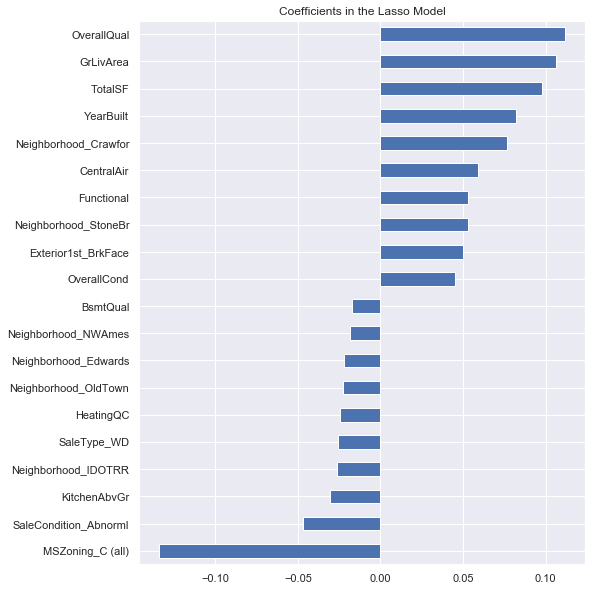

In [561]:
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

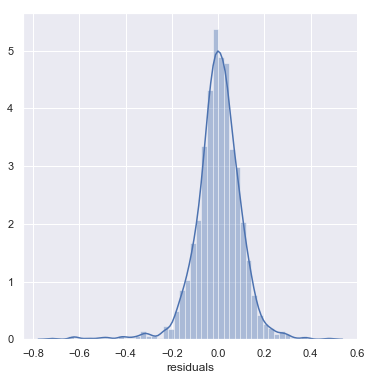

In [566]:
sns.distplot(preds["residuals"]);

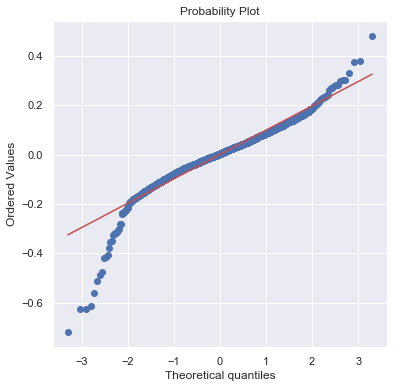

In [568]:
fig = plt.figure()
res = stats.probplot(preds["residuals"], plot=plt)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


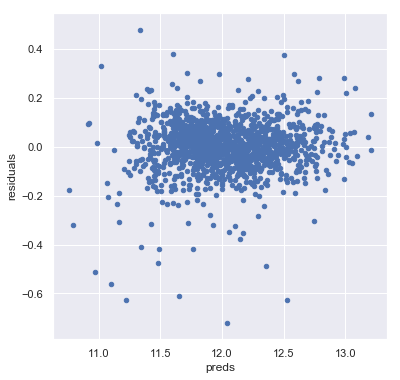

In [564]:
#let's look at the residuals as well:

plt.rcParams['figure.figsize'] = (6.0, 6.0)
preds = pd.DataFrame({"preds":enetcv.predict(X_train_transformed), "true":y_train})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter");


In [575]:
dtrain = xgb.DMatrix(X_train_transformed, label = y_train)
#dtest = xgb.DMatrix(X_test)

params = {"max_depth":4, "learning_rate":0.05}

model = xgb.cv(params, nfold=10, dtrain,  num_boost_round=500, shuffle=True)


In [581]:
model.shape[0]

500

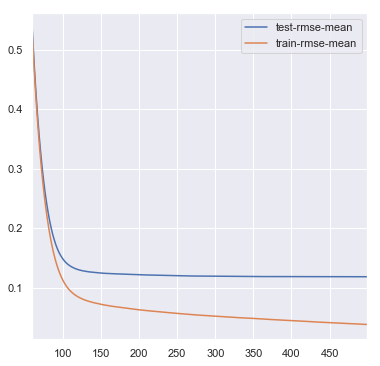

In [579]:
model.loc[60:,["test-rmse-mean", "train-rmse-mean"]].plot()

In [571]:
model_xgb = xgb.XGBRegressor(objective="reg:squarederror", booster=gbtree,
    colsample_bytree=0.6, gamma=0.01, 
                             learning_rate=0.05, max_depth=4, 
                             n_estimators=1000,
                             reg_alpha=0.4, 
                             reg_lambda=0.8,
                             subsample=0.5, 
                             random_state =7, 
                            )

In [572]:

score = rmse_cv(model_xgb,X_train_transformed,y_train)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.1161 (0.0147)



In [618]:
featureimportances= pd.Series(model_xgb.fit(X_train_transformed,y_train).feature_importances_, index=train.columns)

featureimportances

MSSubClass              0.002
LotFrontage             0.002
LotArea                 0.005
Street                  0.004
LotShape                0.002
LandSlope               0.002
OverallQual             0.053
OverallCond             0.010
YearBuilt               0.017
YearRemodAdd            0.014
ExterQual               0.004
ExterCond               0.002
BsmtQual                0.007
BsmtCond                0.003
BsmtExposure            0.003
BsmtFinType1            0.003
BsmtFinSF1              0.006
BsmtFinType2            0.002
BsmtFinSF2              0.002
BsmtUnfSF               0.003
TotalBsmtSF             0.002
HeatingQC               0.003
CentralAir              0.018
1stFlrSF                0.004
2ndFlrSF                0.002
LowQualFinSF            0.001
GrLivArea               0.008
BsmtFullBath            0.002
BsmtHalfBath            0.003
FullBath                0.003
                         ... 
Exterior2nd_VinylSd     0.003
Exterior2nd_Wd Sdng     0.002
Exterior2n

xgb picked 148 variables and eliminated the other 44 variables


Text(0.5, 1.0, 'Coefficients in the Lasso Model')

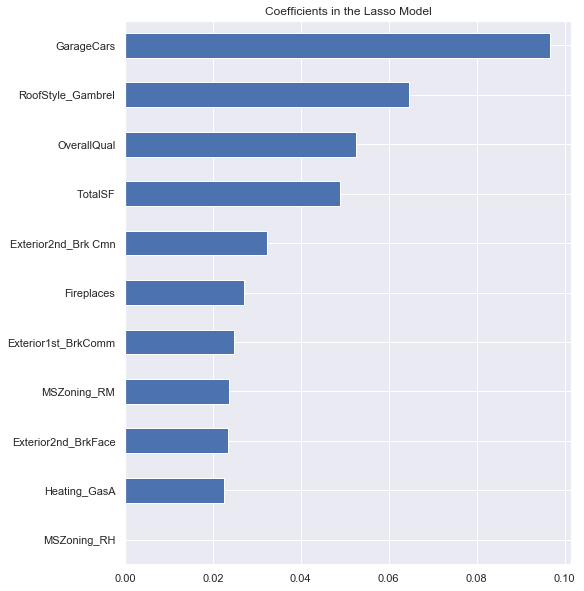

In [622]:
print("xgb picked " + str(sum(featureimportances != 0)) + " variables and eliminated the other " +  str(sum(featureimportances == 0)) + " variables")

imp_coef = pd.concat([featureimportances.sort_values().head(1),
                     featureimportances.sort_values().tail(10)])

plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

In [ ]:
xgb_preds = np.expm1(model_xgb.predict(X_test))
lasso_preds = np.expm1(model_lasso.predict(X_test))

In [ ]:
predictions = pd.DataFrame({"xgb":xgb_preds, "lasso":lasso_preds})
predictions.plot(x = "xgb", y = "lasso", kind = "scatter")

In [623]:
from sklearn.model_selection import GridSearchCV 
param_test1 = {
 'max_depth':range(3,6,1),
 'min_child_weight':range(1,5,1)
}
gsearch1 = GridSearchCV(estimator = xgb.XGBRegressor( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'reg:squarederror', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring="neg_mean_squared_error",n_jobs=4,iid=False, cv=10)

gsearch1.fit(X_train_transformed,y_train)



GridSearchCV(cv=10, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=0.8, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=5,
                                    min_child_weight=1, missing=None,
                                    n_estimators=140, n_jobs=1, nthread=4,
                                    objective='reg:squarederror',
                                    random_state=0, reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=27, silent=None,
                                    subsample=0.8, verbosity=1),
             iid=False, n_jobs=4,
             param_grid={'max_depth': range(3, 6),
                         'min_child_weight': range(1, 5)},
             pre_dispatch=

In [624]:
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 4, 'min_child_weight': 3}, -0.01314168075964527)

In [625]:
gsearch1.cv_results_

{'mean_fit_time': array([0.97056448, 0.98804343, 0.97078013, 0.95879691, 1.11513677,
        1.11547906, 1.11122682, 1.14025736, 1.29335279, 1.29725356,
        1.26042447, 1.26248469]),
 'std_fit_time': array([0.01642667, 0.01158955, 0.01594978, 0.00430799, 0.00448222,
        0.01473462, 0.00593129, 0.02960172, 0.03218907, 0.02794951,
        0.01209994, 0.00803716]),
 'mean_score_time': array([0.0013056 , 0.00136976, 0.0013901 , 0.00129783, 0.00150898,
        0.00137937, 0.00142858, 0.00138032, 0.00160589, 0.00153461,
        0.00161717, 0.00154266]),
 'std_score_time': array([6.04938414e-05, 1.09609855e-04, 1.03249684e-04, 4.85836286e-05,
        1.54910532e-04, 6.43612047e-05, 7.62901790e-05, 5.60642949e-05,
        9.58903520e-05, 3.83294035e-05, 1.27209414e-04, 6.82227338e-05]),
 'param_max_depth': masked_array(data=[3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
 

In [552]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV

alphas = [0.0005,  0.005, 0.05,0.1, 0.3, 1, 2, 3, 3.5,4.5, 5,6,7,8,9, 10,20,30]
cv_ridge = [rmse_cv(Ridge(alpha = alpha),X_train_transformed,y_train).mean() for alpha in alphas]


Text(0, 0.5, 'rmse')

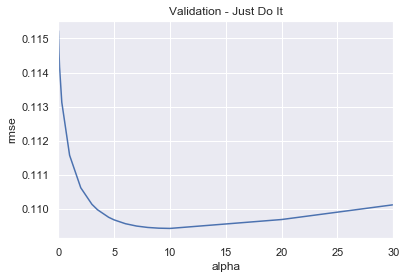

In [553]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [554]:
cv_ridge.min()

0.10942850640470038

In [398]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))


In [400]:
score = rmse_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1096 (0.0141)



In [425]:
score = rmse_cv(ElasticNet(random_state=3))
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1643 (0.0171)



In [407]:

score = rmse_cv(Lasso(alpha =0.0005, random_state=1))
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))



Lasso score: 0.1710 (0.0167)



In [429]:
score = rmse_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.1231 (0.0183)

